##Transfer Learning resnet50 using Keras

In [1]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model

#from keras.applications.inception_v3 import InceptionV3
#from keras.applications.Xception import Xception
#from keras.applications.MobileNetV2 import MobileNetV2
#from keras.applications.vgg16 import VGG16
#from keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import ResNet50

#from keras.applications.resnet50 import ResNet50

from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [4]:


train_path = '/content/drive/MyDrive/Dataset/chest_xray/train'
valid_path = '/content/drive/MyDrive/Dataset/chest_xray/test'


In [5]:
# Import the resnet50 library as shown below and add preprocessing layer to the front of resnet50
# Here we will be using imagenet weights
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


94781440/94765736 [==============================] - 1s 0us/step


In [6]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Dataset/chest_xray/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(1, activation='sigmoid')(x)
# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

In [12]:

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 5302 images belonging to 2 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 654 images belonging to 2 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
166/166 [==============================] - 1119s 6s/step - loss: 0.5347 - accuracy: 0.7867 - val_loss: 0.4113 - val_accuracy: 0.8089
Epoch 2/10
166/166 [==============================] - 892s 5s/step - loss: 0.3374 - accuracy: 0.8512 - val_loss: 0.6118 - val_accuracy: 0.7171
Epoch 3/10
166/166 [==============================] - 944s 6s/step - loss: 0.3292 - accuracy: 0.8585 - val_loss: 0.7698 - val_accuracy: 0.7018
Epoch 4/10
166/166 [==============================] - 889s 5s/step - loss: 0.3259 - accuracy: 0.8729 - val_loss: 0.3237 - val_accuracy: 0.8593
Epoch 5/10
166/166 [==============================] - 883s 5s/step - loss: 0.2572 - accuracy: 0.8902 - val_loss: 0.3876 - val_accuracy: 0.8211
Epoch 6/10
166/166 [==============================] - 883s 5s/step - loss: 0.2440 - accuracy: 0.8959 - val_loss: 0.3469 - val_accuracy: 0.8440
Epoch 7/10
166/166 [==============================] - 883s 5s/step - loss: 0.2598 - accuracy: 0.8951 - val_loss: 0.3302 - val_accuracy: 0.860

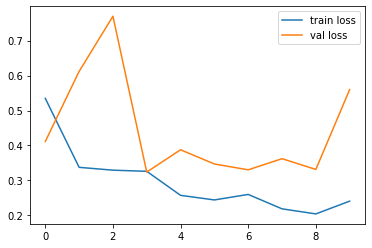

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


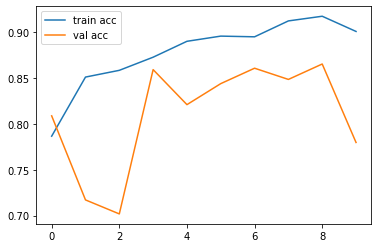

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
from re import I
import os,cv2
from PIL.Image import NORMAL
test_data=[]
test_labels=[]
for i in ['/NORMAL/', '/PNEUMONIA/']:
    for img in (os.listdir('/content/drive/MyDrive/Dataset/chest_xray/test/' +i)):
        img=plt.imread('/content/drive/MyDrive/Dataset/chest_xray/test/'+ i+img)
        img= cv2.resize(img, (224,224))
        img= np.dstack([img, img,img])
        img=img.astype('float32')/ 255
        if i=='/NORMAL/':
          label=0
        elif i=='/PNEUMONIA/':
          label=1
        test_data.append(img)
        test_labels.append(label)

In [20]:
test_data=np.array(test_data)
test_labels=np.array(test_labels)

In [21]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
preds= model.predict(test_data)
acc= accuracy_score(test_labels,np.round(preds))*100
cm=confusion_matrix(test_labels,np.round(preds))
tn,fp,fn,tp= cm.ravel()
print("confusion_matrix===========")
print(cm)
print("\ntest_matrix==============")
precision=tp/(tp+fp)
recall=tp/(tp+fn)
sensitivity=tn/(tn+fp)
print('accuracy: {}%'.format(acc))
print('precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-scor: {}%'.format(2*precision*recall/(precision+recall)))

print('\n train matrix===========')
print('train acc:{}'.format(np.round((r.history['accuracy'][-1])*100,2)))

confusion_matrix===========
[[102 140]
 [  3 409]]

test_matrix==============
accuracy: 78.13455657492355%
precision: 0.7449908925318761%
Recall: 0.9927184466019418%
F1-scor: 0.8511966701352757%

 train matrix===========
train acc:90.1


In [22]:
print(classification_report(test_labels,np.round(preds),target_names=['Normal','Pneumonia']))

              precision    recall  f1-score   support

      Normal       0.97      0.42      0.59       242
   Pneumonia       0.74      0.99      0.85       412

    accuracy                           0.78       654
   macro avg       0.86      0.71      0.72       654
weighted avg       0.83      0.78      0.75       654



<Figure size 432x288 with 0 Axes>

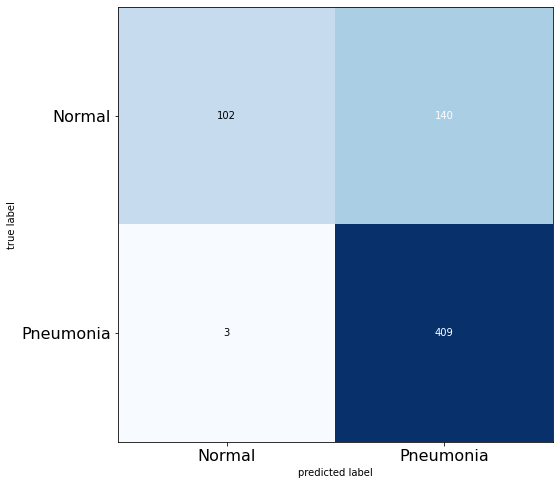

In [23]:
from mlxtend.plotting import plot_confusion_matrix
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8),hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(2),['Normal','Pneumonia'],fontsize=16)
plt.yticks(range(2),['Normal','Pneumonia'],fontsize=16)
plt.show()

In [24]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model

model.save('model_resnet.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [25]:
from keras.models import load_model

In [26]:
from keras.preprocessing import image


In [27]:
model=load_model('model_resnet.h5')

In [28]:
img=image.load_img('/content/drive/MyDrive/Dataset/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg',target_size=(224,224))


In [29]:
x=image.img_to_array(img)

In [30]:
x=np.expand_dims(x, axis=0)

In [31]:
img_data=preprocess_input(x)

In [32]:
classes=model.predict(img_data)

In [33]:
result=int(classes[0][0])

In [34]:
if result==0:
    print("Person is Affected By PNEUMONIA")
else:
    print("Result is Normal")

Result is Normal
